In [2]:
import os 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np # linear algebra
import pandas as pd 
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [3]:
uncleaned_dataset = pd.read_csv('/kaggle/input/data-science-job-posting-on-glassdoor/Uncleaned_DS_jobs.csv')

In [4]:
uncleaned_dataset.shape

(672, 15)

In [5]:
uncleaned_dataset.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

# ****ETA of the columns ****

In [6]:
sorted(uncleaned_dataset['Job Title'].unique())

['(Sr.) Data Scientist -',
 'AI Data Scientist',
 'AI Ops Data Scientist',
 'AI/ML - Machine Learning Scientist, Siri Understanding',
 'Analytics - Business Assurance Data Analyst',
 'Analytics Manager',
 'Analytics Manager - Data Mart',
 'Applied AI Scientist / Engineer',
 'Applied Computer Scientist',
 'Applied Technology Researcher / Data Scientist',
 'Associate Data Scientist',
 'Aviation AI/ML Data Scientist',
 'Big Data Engineer',
 'Business Data Analyst',
 'Business Intelligence Analyst',
 'Business Intelligence Analyst I- Data Insights',
 'COMPUTER SCIENTIST - ENGINEER - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING',
 'COMPUTER SCIENTIST - ENGINEER - RESEARCH COMPUTER SCIENTIST - TRANSPORTATION TECHNOLOGY',
 'Chief Scientist',
 'Clinical Data Analyst',
 'Cloud Data Engineer (Azure)',
 'Computational Behavioral Scientist',
 'Computational Scientist',
 'Computational Scientist, Machine Learning',
 'Computer Scientist 1',
 'Computer Vision / Deep Learning Scientist',
 'Data & M

In [7]:
title_keywords = {
    'Data Scientist': ['data scientist', 'ml/data scientist', 'senior research statistician', 'research statistician'],
    'Machine Learning Engineer': ['machine learning engineer', 'ml engineer', 'ml scientist'],
    'Data Engineer': ['data engineer', 'data & analytics platform engineer', 'software data engineer', 'etl engineer'],
    'Analyst': ['data analyst', 'business intelligence analyst', 'analytics', 'bi analyst', 'quantitative analyst'],
    'Manager': ['manager', 'lead', 'head'],
    'Director': ['director', 'vp', 'vice president'],
    'Research Scientist': ['research scientist', 'computational scientist', 'behavioral scientist'],
    'Computer Scientist': ['computer scientist', 'software engineer', 'developer'],
    'Statistician': ['statistical scientist', 'statistician'],
    'Bio Scientist': ['molecular biology', 'biomarker', 'ngs', 'lab scientist'],
    'Other': []  # fallback
}



In [8]:
def clean_job_title(title):
    title_lower = title.lower()
    for category, keywords in title_keywords.items():
        for keyword in keywords:
            if keyword in title_lower:
                return category
    return 'Other'

# df = pd.DataFrame({'Job Title': job_titles_list})
uncleaned_dataset['Cleaned Job Title'] = uncleaned_dataset['Job Title'].apply(clean_job_title)
uncleaned_dataset['Cleaned Job Title'].unique()

array(['Data Scientist', 'Other', 'Analyst', 'Bio Scientist',
       'Data Engineer', 'Machine Learning Engineer', 'Research Scientist',
       'Manager', 'Computer Scientist', 'Statistician', 'Director'],
      dtype=object)

In [9]:
# Salary Estimate Columns
sorted(uncleaned_dataset['Salary Estimate'].unique())

['$101K-$165K (Glassdoor est.)',
 '$105K-$167K (Glassdoor est.)',
 '$110K-$163K (Glassdoor est.)',
 '$112K-$116K (Glassdoor est.)',
 '$122K-$146K (Glassdoor est.)',
 '$124K-$198K (Glassdoor est.)',
 '$128K-$201K (Glassdoor est.)',
 '$137K-$171K (Glassdoor est.)',
 '$138K-$158K (Glassdoor est.)',
 '$141K-$225K (Glassdoor est.)',
 '$145K-$225K(Employer est.)',
 '$212K-$331K (Glassdoor est.)',
 '$31K-$56K (Glassdoor est.)',
 '$56K-$97K (Glassdoor est.)',
 '$66K-$112K (Glassdoor est.)',
 '$69K-$116K (Glassdoor est.)',
 '$71K-$123K (Glassdoor est.)',
 '$75K-$131K (Glassdoor est.)',
 '$79K-$106K (Glassdoor est.)',
 '$79K-$131K (Glassdoor est.)',
 '$79K-$133K (Glassdoor est.)',
 '$79K-$147K (Glassdoor est.)',
 '$80K-$132K (Glassdoor est.)',
 '$87K-$141K (Glassdoor est.)',
 '$90K-$109K (Glassdoor est.)',
 '$90K-$124K (Glassdoor est.)',
 '$91K-$150K (Glassdoor est.)',
 '$92K-$155K (Glassdoor est.)',
 '$95K-$119K (Glassdoor est.)',
 '$99K-$132K (Glassdoor est.)']

In [10]:
def clean_and_convert_salary(s):
    try:
        # Clean the text
        s = s.replace('(Employer est.)', '').replace('(Glassdoor est.)', '')
        s = s.replace('$', '').replace('K', '').replace(' ', '')
        
        # Split and multiply by 1000
        low, high = s.split('-')
        return f"{int(low)*1000}-{int(high)*1000}"
    except:
        return 'NA'

uncleaned_dataset['Salary Estimate'] = uncleaned_dataset['Salary Estimate'].apply(clean_and_convert_salary)
uncleaned_dataset['Salary Estimate']

0      137000-171000
1      137000-171000
2      137000-171000
3      137000-171000
4      137000-171000
           ...      
667    105000-167000
668    105000-167000
669    105000-167000
670    105000-167000
671    105000-167000
Name: Salary Estimate, Length: 672, dtype: object

In [11]:

uncleaned_dataset["Job Description"][150]

'JOB SUMMARY\nResponsible for designing, analyzing, modeling, and deploying analytical applications to enrich the agent and customer experience in the Agent Portal organization.\n\nMAJOR DUTIES AND RESPONSIBILITIES\nActively and consistently support all efforts to simplify and enhance the customer experience\nUnderstand customer business use cases and be able to translate them to technical specifications and vision on how to implement a solution\nClearly communicate the benefits of the analytic solutions to both a business as well as a technical audience\nLeverage knowledge in analytic and statistical algorithms to help customers explore methods to improve their business\nLead large-scale analytical research projects through all stages including concept formulation, determination of appropriate statistical methodology, data manipulation, research evaluation, and final research report\nDesign, build, and extract large and complex data sets while thinking strategically about uses of data

In [12]:
uncleaned_dataset['Job Description'] = (
    uncleaned_dataset['Job Description']
    .str.replace('•', '.', regex=False)
    .str.replace('\n', ' ', regex=False)
    .str.strip()
)
uncleaned_dataset['Job Description'][150]

'JOB SUMMARY Responsible for designing, analyzing, modeling, and deploying analytical applications to enrich the agent and customer experience in the Agent Portal organization.  MAJOR DUTIES AND RESPONSIBILITIES Actively and consistently support all efforts to simplify and enhance the customer experience Understand customer business use cases and be able to translate them to technical specifications and vision on how to implement a solution Clearly communicate the benefits of the analytic solutions to both a business as well as a technical audience Leverage knowledge in analytic and statistical algorithms to help customers explore methods to improve their business Lead large-scale analytical research projects through all stages including concept formulation, determination of appropriate statistical methodology, data manipulation, research evaluation, and final research report Design, build, and extract large and complex data sets while thinking strategically about uses of data and how 

In [13]:
# Rating Column

sorted(uncleaned_dataset['Rating'].unique())

[-1.0,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0]

In [14]:
uncleaned_dataset['Rating'] = np.where(uncleaned_dataset['Rating'] == -1,0,uncleaned_dataset['Rating'])
sorted(uncleaned_dataset.Rating.unique())

[0.0,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0]

In [15]:
# 'Company Name' Column

sorted(uncleaned_dataset['Company Name'].unique())

['1-800-Flowers\n2.7',
 '1010data\n3.1',
 '10x Genomics\n4.2',
 '1904labs\n4.7',
 '22nd Century Technologies\n3.7',
 '7Park Data\n3.9',
 'A Place for Mom\n2.7',
 'A-Line Staffing Solutions\n4.1',
 'ABIOMED\n4.1',
 'ALTA IT Services\n3.9',
 'ASRC Federal Holding Company\n3.4',
 'AccessHope',
 'Acuity Insurance\n4.8',
 'Advance Sourcing Concepts\n3.4',
 'Advanced Bio-Logic Solutions Corp\n4.0',
 'Advanced BioScience Laboratories\n2.7',
 'Adwait Algorithm\n4.4',
 'AeroVironment\n4.2',
 'Affinity Solutions\n2.9',
 'AgreeYa Solutions\n3.8',
 'Alaka`ina Foundation Family of Companies\n3.6',
 'Alector\n4.8',
 'Alignment Healthcare\n3.5',
 'Alion Science & Technology\n3.6',
 'Allen Institute\n3.5',
 'AllianceBernstein\n3.2',
 'Allied Solutions\n3.4',
 'Altus Group\n3.7',
 'Americo Life\n3.3',
 'Ameritas Life Insurance Corp\n3.0',
 'Amyris\n3.3',
 'Analysis Group\n3.8',
 'Apex Systems\n3.9',
 'AppLovin\n4.8',
 'Apple\n4.1',
 'Applied Research Laboratories\n3.8',
 'Aptive\n3.5',
 'Argo Group US\

In [16]:
uncleaned_dataset['Company Name'] = uncleaned_dataset['Company Name'].replace(r'\n\d\.\d', '', regex=True)

sorted(uncleaned_dataset['Company Name'].unique())

['1-800-Flowers',
 '1010data',
 '10x Genomics',
 '1904labs',
 '22nd Century Technologies',
 '7Park Data',
 'A Place for Mom',
 'A-Line Staffing Solutions',
 'ABIOMED',
 'ALTA IT Services',
 'ASRC Federal Holding Company',
 'AccessHope',
 'Acuity Insurance',
 'Advance Sourcing Concepts',
 'Advanced Bio-Logic Solutions Corp',
 'Advanced BioScience Laboratories',
 'Adwait Algorithm',
 'AeroVironment',
 'Affinity Solutions',
 'AgreeYa Solutions',
 'Alaka`ina Foundation Family of Companies',
 'Alector',
 'Alignment Healthcare',
 'Alion Science & Technology',
 'Allen Institute',
 'AllianceBernstein',
 'Allied Solutions',
 'Altus Group',
 'Americo Life',
 'Ameritas Life Insurance Corp',
 'Amyris',
 'Analysis Group',
 'Apex Systems',
 'AppLovin',
 'Apple',
 'Applied Research Laboratories',
 'Aptive',
 'Argo Group US',
 'Arsenal Biosciences',
 'AstraZeneca',
 'Autodesk',
 'Averity',
 'Aveshka, Inc.',
 'Avlino',
 'Axiologic Solutions',
 'B4Corp',
 'BWX Technologies',
 'Battelle',
 'Bayside Solut

In [17]:
# Location Column

sorted(uncleaned_dataset.Location.unique())

['Adelphi, MD',
 'Akron, OH',
 'Alexandria, VA',
 'Alpharetta, GA',
 'Ann Arbor, MI',
 'Annapolis Junction, MD',
 'Appleton, WI',
 'Arlington, VA',
 'Ashburn, VA',
 'Atlanta, GA',
 'Aurora, CO',
 'Austin, TX',
 'Baltimore, MD',
 'Beavercreek, OH',
 'Bedford, MA',
 'Bellevue, WA',
 'Bethesda, MD',
 'Birmingham, AL',
 'Blue Bell, PA',
 'Boston, MA',
 'Bothell, WA',
 'Boulder, CO',
 'Bridgeport, WV',
 'Brisbane, CA',
 'Brooklyn, NY',
 'Burbank, CA',
 'Burlingame, CA',
 'California',
 'Cambridge, MA',
 'Carmel, IN',
 'Carpinteria, CA',
 'Carson, CA',
 'Cedar Rapids, IA',
 'Champaign, IL',
 'Chandler, AZ',
 'Chantilly, VA',
 'Charlotte, NC',
 'Chicago, IL',
 'Cincinnati, OH',
 'Cleveland, OH',
 'Collegeville, PA',
 'Colorado Springs, CO',
 'Columbia, MD',
 'Columbia, MO',
 'Columbia, SC',
 'Concord, CA',
 'Coral Gables, FL',
 'Culver City, CA',
 'Cupertino, CA',
 'Dallas, TX',
 'Danvers, MA',
 'Dayton, OH',
 'Dearborn, MI',
 'Denver, CO',
 'Durham, NC',
 'Edison, NJ',
 'Emeryville, CA',
 'E

In [18]:
# Regular expression to split the location into city and state
uncleaned_dataset[['City', 'State']] = uncleaned_dataset['Location'].str.extract(r'^(.*?),\s*([A-Z]{2})$')

# Drop the original 'location' column if it's no longer needed
uncleaned_dataset.drop(columns=['Location'], inplace=True)


In [19]:
sorted(uncleaned_dataset.Headquarters.unique())

['-1',
 'Akron, OH',
 'Albertville, AL',
 'Albuquerque, NM',
 'Alexandria, VA',
 'Aliso Viejo, CA',
 'Alpharetta, GA',
 'Annapolis Junction, MD',
 'Arlington, VA',
 'Armonk, NY',
 'Ashburn, VA',
 'Atlanta, GA',
 'Aurora, CO',
 'Aurora, Canada',
 'Austin, TX',
 'Bad Ragaz, Switzerland',
 'Baltimore, MD',
 'Bangalore, India',
 'Basel, Switzerland',
 'Beavercreek, OH',
 'Bedford, MA',
 'Bellevue, WA',
 'Beltsville, MD',
 'Bengaluru, India',
 'Benicia, CA',
 'Bethesda, MD',
 'Birmingham, AL',
 'Blue Bell, PA',
 'Boston, MA',
 'Brentford, United Kingdom',
 'Brisbane, CA',
 'Bristol, PA',
 'Burlingame, CA',
 'Cambridge, MA',
 'Cambridge, United Kingdom',
 'Carle Place, NY',
 'Carmel, IN',
 'Carpinteria, CA',
 'Carson, CA',
 'Cedar Rapids, IA',
 'Chadds Ford, PA',
 'Chandler, AZ',
 'Chantilly, VA',
 'Charlotte, NC',
 'Chennai, India',
 'Cherry Hill, NJ',
 'Chevy Chase, MD',
 'Chicago, IL',
 'Cincinnati, OH',
 'Cleveland, OH',
 'Clifton Park, NY',
 'Coconut Creek, FL',
 'Columbia, MD',
 'Colum

In [20]:
uncleaned_dataset[['Headquarter', 'Headquarters State']] = (uncleaned_dataset['Headquarters'].str.split(',', expand=True))

clean_df = uncleaned_dataset.drop('Headquarters',axis=1)

clean_df['Headquarters State'].unique()

array([' NY', ' VA', ' MA', ' Switzerland', ' CA', ' IL', ' MO', ' WA',
       ' NJ', ' DC', ' TN', ' AZ', ' PA', ' GA', ' FL', ' WI', ' NE',
       ' Singapore', ' Japan', ' LA', ' OH', ' IN', ' MD', ' CT',
       ' United Kingdom', ' MN', ' TX', ' UT', ' CO', ' OR', ' MI', ' SC',
       None, ' France', ' Canada', ' Bermuda', ' IA', ' India', ' Israel',
       ' NC', ' AL', ' Sweden', ' 061', ' WV', ' HI', ' Spain', ' NM'],
      dtype=object)

In [21]:
clean_df.Headquarter = clean_df.Headquarter.str.strip()
clean_df['Headquarters State'] = clean_df['Headquarters State'].str.strip()
clean_df['Headquarters State'].unique()

array(['NY', 'VA', 'MA', 'Switzerland', 'CA', 'IL', 'MO', 'WA', 'NJ',
       'DC', 'TN', 'AZ', 'PA', 'GA', 'FL', 'WI', 'NE', 'Singapore',
       'Japan', 'LA', 'OH', 'IN', 'MD', 'CT', 'United Kingdom', 'MN',
       'TX', 'UT', 'CO', 'OR', 'MI', 'SC', None, 'France', 'Canada',
       'Bermuda', 'IA', 'India', 'Israel', 'NC', 'AL', 'Sweden', '061',
       'WV', 'HI', 'Spain', 'NM'], dtype=object)

In [22]:
# Size Column

sorted(clean_df.Size.unique())

['-1',
 '1 to 50 employees',
 '10000+ employees',
 '1001 to 5000 employees',
 '201 to 500 employees',
 '5001 to 10000 employees',
 '501 to 1000 employees',
 '51 to 200 employees',
 'Unknown']

In [23]:
clean_df.Size = np.where(clean_df.Size == '-1','Unknown',clean_df.Size)
clean_df.Size = clean_df.Size.apply(lambda x: x.replace(' to ','-').replace(' employees',''))
sorted(clean_df['Size'].unique())

['1-50',
 '10000+',
 '1001-5000',
 '201-500',
 '5001-10000',
 '501-1000',
 '51-200',
 'Unknown']

In [24]:
# Type of ownership column
clean_df['Type of ownership'].dtype
sorted(clean_df['Type of ownership'].unique())

['-1',
 'College / University',
 'Company - Private',
 'Company - Public',
 'Contract',
 'Government',
 'Hospital',
 'Nonprofit Organization',
 'Other Organization',
 'Private Practice / Firm',
 'Self-employed',
 'Subsidiary or Business Segment',
 'Unknown']

In [25]:
clean_df['Type of ownership'] = np.where(clean_df['Type of ownership'] == '-1','Unknown',clean_df['Type of ownership'])

In [26]:
ownership_map = {
    'Company - Public': 'Public Company',
    'Company - Private': 'Private Company',
    'Private Practice / Firm': 'Private Company',
    'Subsidiary or Business Segment': 'Business',
    'College / University': 'Education'
}

def ownership_type(value):
    for key, replacement in ownership_map.items():
        if key in value:
            return value.replace(key, replacement)
    return value

clean_df['Type of ownership'] = clean_df['Type of ownership'].apply(ownership_type)
clean_df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Public Company', 'Private Company',
       'Government', 'Business', 'Other Organization', 'Unknown',
       'Hospital', 'Self-employed', 'Education', 'Contract'], dtype=object)

In [27]:
# Industry Column

clean_df.Industry.dtype
sorted(clean_df.Industry.unique())

['-1',
 'Accounting',
 'Advertising & Marketing',
 'Aerospace & Defense',
 'Architectural & Engineering Services',
 'Banks & Credit Unions',
 'Biotech & Pharmaceuticals',
 'Cable, Internet & Telephone Providers',
 'Chemical Manufacturing',
 'Colleges & Universities',
 'Computer Hardware & Software',
 'Construction',
 'Consulting',
 'Consumer Electronics & Appliances Stores',
 'Consumer Products Manufacturing',
 'Department, Clothing, & Shoe Stores',
 'Electrical & Electronic Manufacturing',
 'Energy',
 'Enterprise Software & Network Solutions',
 'Express Delivery Services',
 'Farm Support Services',
 'Federal Agencies',
 'Financial Transaction Processing',
 'Food & Beverage Manufacturing',
 'Food & Beverage Stores',
 'Health Care Services & Hospitals',
 'Health, Beauty, & Fitness',
 'Hotels, Motels, & Resorts',
 'IT Services',
 'Industrial Manufacturing',
 'Insurance Agencies & Brokerages',
 'Insurance Carriers',
 'Internet',
 'Investment Banking & Asset Management',
 'Lending',
 'Logi

In [28]:
clean_df.Industry = np.where(clean_df.Industry == '-1','N/A',clean_df.Industry)
clean_df.Industry = clean_df.Industry.str.replace('&','and')
sorted(clean_df.Industry.unique())

['Accounting',
 'Advertising and Marketing',
 'Aerospace and Defense',
 'Architectural and Engineering Services',
 'Banks and Credit Unions',
 'Biotech and Pharmaceuticals',
 'Cable, Internet and Telephone Providers',
 'Chemical Manufacturing',
 'Colleges and Universities',
 'Computer Hardware and Software',
 'Construction',
 'Consulting',
 'Consumer Electronics and Appliances Stores',
 'Consumer Products Manufacturing',
 'Department, Clothing, and Shoe Stores',
 'Electrical and Electronic Manufacturing',
 'Energy',
 'Enterprise Software and Network Solutions',
 'Express Delivery Services',
 'Farm Support Services',
 'Federal Agencies',
 'Financial Transaction Processing',
 'Food and Beverage Manufacturing',
 'Food and Beverage Stores',
 'Health Care Services and Hospitals',
 'Health, Beauty, and Fitness',
 'Hotels, Motels, and Resorts',
 'IT Services',
 'Industrial Manufacturing',
 'Insurance Agencies and Brokerages',
 'Insurance Carriers',
 'Internet',
 'Investment Banking and Asset 

In [29]:
# Revenue Column

print(clean_df.Revenue.dtype)
sorted(clean_df.Revenue.unique())

object


['$1 to $2 billion (USD)',
 '$1 to $5 million (USD)',
 '$10 to $25 million (USD)',
 '$10+ billion (USD)',
 '$100 to $500 million (USD)',
 '$2 to $5 billion (USD)',
 '$25 to $50 million (USD)',
 '$5 to $10 billion (USD)',
 '$5 to $10 million (USD)',
 '$50 to $100 million (USD)',
 '$500 million to $1 billion (USD)',
 '-1',
 'Less than $1 million (USD)',
 'Unknown / Non-Applicable']

In [30]:
clean_df.Revenue = np.where(clean_df.Revenue == '-1', 'N/A',clean_df.Revenue)
clean_df.Revenue = np.where(clean_df.Revenue == 'Unknown / Non-Applicable', 'N/A',clean_df.Revenue)

In [31]:
def less_than(value):
    if 'Less than $1 million (USD)' in value:
        return value.replace('$','').replace(' million (USD)','')
    return value

clean_df['Revenue'] = clean_df['Revenue'].apply(less_than)
sorted(clean_df.Revenue.unique())

['$1 to $2 billion (USD)',
 '$1 to $5 million (USD)',
 '$10 to $25 million (USD)',
 '$10+ billion (USD)',
 '$100 to $500 million (USD)',
 '$2 to $5 billion (USD)',
 '$25 to $50 million (USD)',
 '$5 to $10 billion (USD)',
 '$5 to $10 million (USD)',
 '$50 to $100 million (USD)',
 '$500 million to $1 billion (USD)',
 'Less than 1',
 'N/A']

In [32]:
clean_df.Revenue = clean_df.Revenue.apply(lambda x: x.replace('$','').replace(' to ','-').replace(' million (USD)',''))
sorted(clean_df.Revenue.unique())

['1-2 billion (USD)',
 '1-5',
 '10+ billion (USD)',
 '10-25',
 '100-500',
 '2-5 billion (USD)',
 '25-50',
 '5-10',
 '5-10 billion (USD)',
 '50-100',
 '500 million-1 billion (USD)',
 'Less than 1',
 'N/A']

In [33]:
def more_conversion(values):
    if '+ billion (USD)' in values:
        data = values.replace('+ billion (USD)','')
        return str(int(data)*1000)+'+'
    return values

clean_df['Revenue'] = clean_df['Revenue'].apply(more_conversion)
sorted(clean_df.Revenue.unique())

['1-2 billion (USD)',
 '1-5',
 '10-25',
 '100-500',
 '10000+',
 '2-5 billion (USD)',
 '25-50',
 '5-10',
 '5-10 billion (USD)',
 '50-100',
 '500 million-1 billion (USD)',
 'Less than 1',
 'N/A']

In [34]:
def more_conversions(value):
    if '500 million-1 billion (USD)' in value:
        data = value.replace(' million', '').replace(' billion (USD)', '')
        data2 = data.split('-')
        lower_bound = int(data2[0].strip())
        upper_bound = int(float(data2[1].strip()) * 1000)  # Convert billion to million
        bounnd = [str(lower_bound), str(upper_bound)]
        return '-'.join(bounnd)
    return value

clean_df['Revenue'] = clean_df['Revenue'].apply(more_conversions)
sorted(clean_df['Revenue'].unique())

['1-2 billion (USD)',
 '1-5',
 '10-25',
 '100-500',
 '10000+',
 '2-5 billion (USD)',
 '25-50',
 '5-10',
 '5-10 billion (USD)',
 '50-100',
 '500-1000',
 'Less than 1',
 'N/A']

In [35]:
# Function to convert '1-2 billion (USD)' to '1000-2000 million'
def convert_to_millions(value):
    if ' billion (USD)' in value:
        # Remove ' billion (USD)' from the string
        cleaned_value = value.replace(' billion (USD)', '')
        # Split the range if it exists
        range_parts = cleaned_value.split('-')
        # Convert each part from billions to millions
        range_in_millions = [str(int(part) * 1000) for part in range_parts]
        # Join the converted parts with a hyphen
        return '-'.join(range_in_millions)
    return value

# Apply the conversion function to the column
clean_df['Revenue'] = clean_df['Revenue'].apply(convert_to_millions)

sorted(clean_df.Revenue.unique())

['1-5',
 '10-25',
 '100-500',
 '1000-2000',
 '10000+',
 '2000-5000',
 '25-50',
 '5-10',
 '50-100',
 '500-1000',
 '5000-10000',
 'Less than 1',
 'N/A']

In [36]:
# Competitors Columns
sorted(clean_df.Competitors.unique())

['-1',
 'ACRT Services, Bartlett Tree Experts',
 'AT&T, Verizon',
 'Accenture, Deloitte, PwC',
 'Accenture, Northrop Grumman, Xerox',
 'Activision Blizzard, Electronic Arts',
 'Acxiom, Merkle, Epsilon (North Carolina)',
 'Adecco, Manpower',
 'Adecco, ManpowerGroup, Allegis Corporation',
 'Advisory Board, Booz Allen Hamilton, McKinsey & Company',
 'Amazon, Accenture, Microsoft',
 'Amazon, Apple',
 'AppDynamics, Datadog, Dynatrace',
 'Aquent, 24 Seven Talent',
 'Arbella Insurance, Safety Insurance',
 'Archibus, iOffice, Planon',
 'Battelle, General Atomics, SAIC',
 'Bechtel Jacobs, Black & Veatch, HNTB',
 'Booz Allen Hamilton, CACI International',
 'Booz Allen Hamilton, Deloitte, ERPi',
 'Booz Allen Hamilton, SAIC, LMI',
 'Bosch, Lear Corporation, Faurecia',
 'Braintree, Authorize.Net, PayPal',
 'Bromium, FireEye, Authentic8',
 'CDW, PCM, SHI International',
 'CGI (Nevada), Accenture, Deloitte',
 'CSC, ManTech, SAIC',
 'CUNA Mutual, SWBC, Overby-Seawell',
 'Cadence Design Systems, Synops

In [37]:
clean_df = clean_df.drop('Competitors', axis=1)
# Renaming column 'City' to 'Location'

clean_df = clean_df.rename(columns={'City':'Location'})

In [38]:
# Adding columna 'min_salary','max_salary', and 'avg_salary'

clean_df['Min Salary'] = clean_df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
clean_df['Max Salary'] = clean_df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))
# Calculate average salary
clean_df['Average Salary'] = (clean_df['Min Salary'] + clean_df['Max Salary']) / 2


In [39]:
# Create the 'same_state' column
clean_df['Same State'] = np.where(clean_df['State'] == clean_df['Headquarters State'], 'Same State', 'Different State')
clean_df['Same State'].unique()



array(['Same State', 'Different State'], dtype=object)

In [40]:
# Founded Year Column

clean_df.Founded.unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962])

In [41]:
clean_df.Founded = np.where(clean_df.Founded == -1,2024,clean_df.Founded)

In [42]:
# Create the 'company_age' column

clean_df['company_age'] = (datetime.now().year - clean_df.Founded)
clean_df['company_age'].unique()

array([ 32,  57,  44,  25,  27,  15,  29,  35,  42,  11,  13,   9,  60,
        52,  39,  28,  10,  80,  37,   8,  14,  58, 165,  33,  22,  74,
        20,   6, 100,  17,  26,  47,  59, 113,  67,  12, 176, 244,  99,
        19,  31, 162,  30,   1,  43,  51,  24,  40, 112,  54, 114,  16,
        66,  18,  86,  23,  64,  62,  56,  79,  68,  72,  77, 175, 174,
        21,  49, 107,  71,  78,  70,   7,  88, 108,  90,  96, 205,  73,
        93, 131,  65, 237, 195,  41,  92, 145, 138,  55,  83,  45,  36,
       117, 172, 150, 111, 127,  69,  48,  38, 129,  53,  76,  63])

In [43]:
# List of skills to search for
skills = ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big data']

# Function to check each skill in job description
def extract_skills(description):
    desc = description.lower()
    return {skill.title() if skill != 'big data' else 'Big Data': int(skill in desc) for skill in skills}

# Apply the function and expand into separate columns
skill_df = clean_df['Job Description'].apply(extract_skills).apply(pd.Series)

# Merge skill columns into the original dataframe
clean_df = pd.concat([clean_df, skill_df], axis=1)
clean_df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,...,Average Salary,Same State,company_age,Python,Excel,Hadoop,Spark,Aws,Tableau,Big Data
0,0,Sr Data Scientist,137000-171000,Description The Senior Data Scientist is resp...,3.1,Healthfirst,1001-5000,1993,Nonprofit Organization,Insurance Carriers,...,154000.0,Same State,32,0,0,0,0,1,0,0
1,1,Data Scientist,137000-171000,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech,5001-10000,1968,Public Company,Research and Development,...,154000.0,Same State,57,0,0,1,0,0,0,1
2,2,Data Scientist,137000-171000,Overview Analysis Group is one of the larges...,3.8,Analysis Group,1001-5000,1981,Private Company,Consulting,...,154000.0,Same State,44,1,1,0,0,1,0,0
3,3,Data Scientist,137000-171000,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,501-1000,2000,Public Company,Electrical and Electronic Manufacturing,...,154000.0,Different State,25,1,1,0,0,1,0,0
4,4,Data Scientist,137000-171000,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,51-200,1998,Private Company,Advertising and Marketing,...,154000.0,Same State,27,1,1,0,0,0,0,0


In [44]:
# Creating 'Job Type' Column with a bolean value of the job type

def Job_type(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'Senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'Junior'
    else:
        return 'NA'
    
clean_df['Job Type'] = clean_df['Job Title'].apply(Job_type)

In [45]:
clean_df['Job Type'].unique()

array(['Senior', 'NA', 'Junior'], dtype=object)

In [46]:
# Reset index so to drop index column

clean_df = clean_df.reset_index()

In [47]:
clean_df = clean_df.drop('index',axis=1)

In [48]:
clean_df.duplicated().sum()

0

In [49]:
clean_df.shape

(672, 30)

In [50]:
clean_df = clean_df.drop_duplicates()

In [51]:
clean_df.shape

(672, 30)

In [52]:
clean_df.describe()

,level_0,Rating,Founded,Min Salary,Max Salary,Average Salary,company_age,Python,Excel,Hadoop,Spark,Aws,Tableau,Big Data
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,335.500000,3.593006,1991.110119,99196.428571,148130.952381,123663.690476,33.889881,0.730655,0.440476,0.212798,0.281250,0.258929,0.183036,0.206845
std,194.133974,1.176684,39.910217,33009.958111,48035.110051,39580.267895,39.910217,0.443950,0.496814,0.409591,0.449944,0.438373,0.386984,0.405345
min,0.000000,0.000000,1781.000000,31000.000000,56000.000000,43500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,167.750000,3.300000,1983.000000,79000.000000,119000.000000,103000.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,335.500000,3.800000,2004.000000,91000.000000,133000.000000,114000.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,503.250000,4.300000,2015.000000,122000.000000,165000.000000,136500.000000,42.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,671.000000,5.000000,2024.000000,212000.000000,331000.000000,271500.000000,244.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   level_0             672 non-null    int64  
 1   Job Title           672 non-null    object 
 2   Salary Estimate     672 non-null    object 
 3   Job Description     672 non-null    object 
 4   Rating              672 non-null    float64
 5   Company Name        672 non-null    object 
 6   Size                672 non-null    object 
 7   Founded             672 non-null    int64  
 8   Type of ownership   672 non-null    object 
 9   Industry            672 non-null    object 
 10  Sector              672 non-null    object 
 11  Revenue             672 non-null    object 
 12  Cleaned Job Title   672 non-null    object 
 13  Location            649 non-null    object 
 14  State               649 non-null    object 
 15  Headquarter         672 non-null    object 
 16  Headquar

Questions:
* what is the average, max , min of salaries ?
* what is the uniques values in each column ?
* distrubtion in salaries.
* distrubtion in Rates.
* Pie chart for company size.
* bar chart for ownership.
* Pie chart for Revenue.

In [54]:
# what is the average, max , min of salaries 
clean_df.describe()

,level_0,Rating,Founded,Min Salary,Max Salary,Average Salary,company_age,Python,Excel,Hadoop,Spark,Aws,Tableau,Big Data
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,335.500000,3.593006,1991.110119,99196.428571,148130.952381,123663.690476,33.889881,0.730655,0.440476,0.212798,0.281250,0.258929,0.183036,0.206845
std,194.133974,1.176684,39.910217,33009.958111,48035.110051,39580.267895,39.910217,0.443950,0.496814,0.409591,0.449944,0.438373,0.386984,0.405345
min,0.000000,0.000000,1781.000000,31000.000000,56000.000000,43500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,167.750000,3.300000,1983.000000,79000.000000,119000.000000,103000.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,335.500000,3.800000,2004.000000,91000.000000,133000.000000,114000.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,503.250000,4.300000,2015.000000,122000.000000,165000.000000,136500.000000,42.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,671.000000,5.000000,2024.000000,212000.000000,331000.000000,271500.000000,244.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# 2. what is the uniques values in each column ?
for col in clean_df.columns:
    value=clean_df[col].value_counts()
    print('-'*50)
    print(f'Column {col} has {len(value)} unique values\n')
    if col =='Job Description':
        pass
    elif len(value)<20:
        print(f'the unique values are {value}')
    else:
        print(f'the most frequent value are {value.iloc[:15]}\n\n')

--------------------------------------------------
Column level_0 has 672 unique values

the most frequent value are level_0
0      1
451    1
443    1
444    1
445    1
446    1
447    1
448    1
449    1
450    1
452    1
1      1
453    1
454    1
455    1
Name: count, dtype: int64


--------------------------------------------------
Column Job Title has 172 unique values

the most frequent value are Job Title
Data Scientist                                                                                      337
Data Engineer                                                                                        26
Senior Data Scientist                                                                                19
Machine Learning Engineer                                                                            16
Data Analyst                                                                                         12
Senior Data Analyst                                            

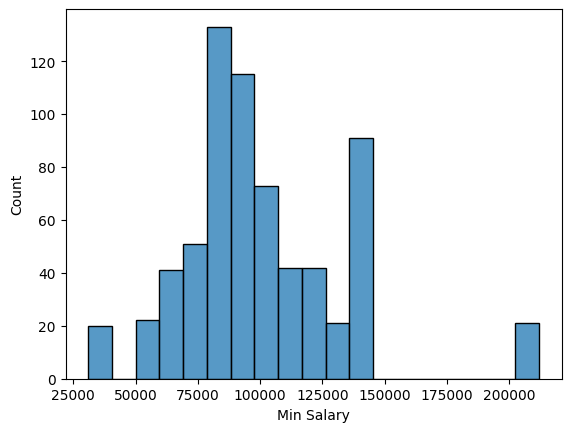

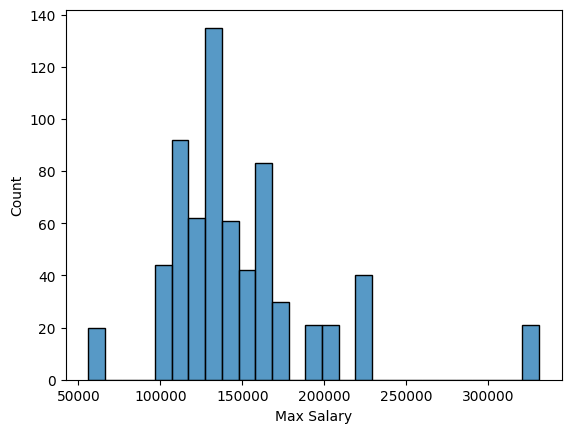

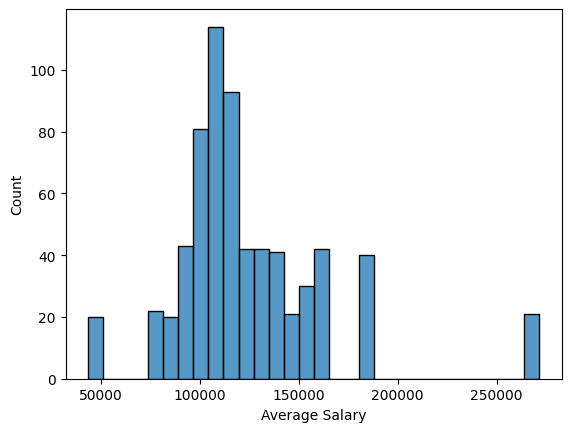

In [57]:
#3. distrubtion in salaries 
for col_name in ['Min Salary', 'Max Salary', 'Average Salary']:
    sns.histplot(data=clean_df, x=col_name)
    plt.show()
#     fig= px.histogram(data_frame=cleaned_data, x= col_name)
#     fig.show()

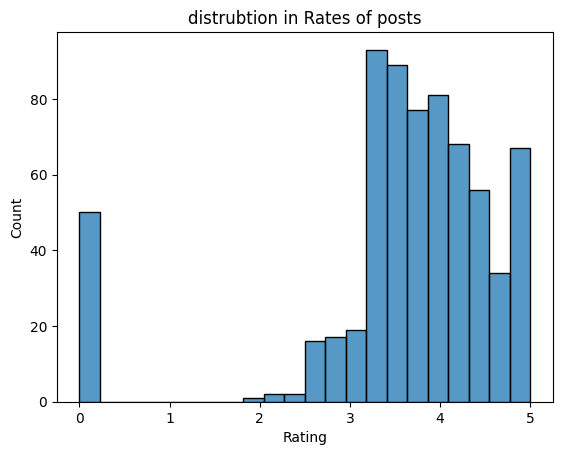

In [58]:
# 4.distrubtion in Rates 
sns.histplot(data=clean_df, x='Rating')
plt.title('distrubtion in Rates of posts')
plt.show()

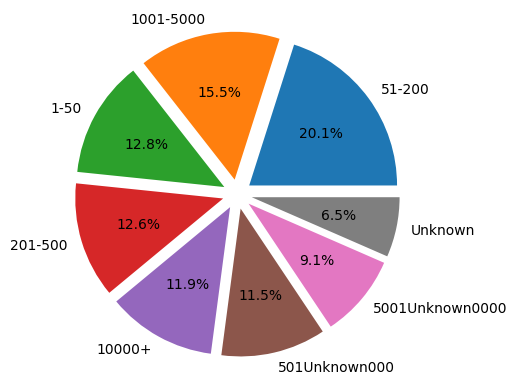

Size
51-200             135
1001-5000          104
1-50                86
201-500             85
10000+              80
501Unknown000       77
5001Unknown0000     61
Unknown             44
Name: count, dtype: int64

In [59]:
# 5.Pie chart for company size 
clean_df.Size=clean_df.Size.str.replace('-1','Unknown').str.replace('employees','').str.replace(' to ',':')
size_clean_data = clean_df.Size.value_counts()
plt.pie(x= size_clean_data.values, labels=size_clean_data.index, explode=[0.1]*8,autopct = '%1.1f%%' )
plt.show()
size_clean_data

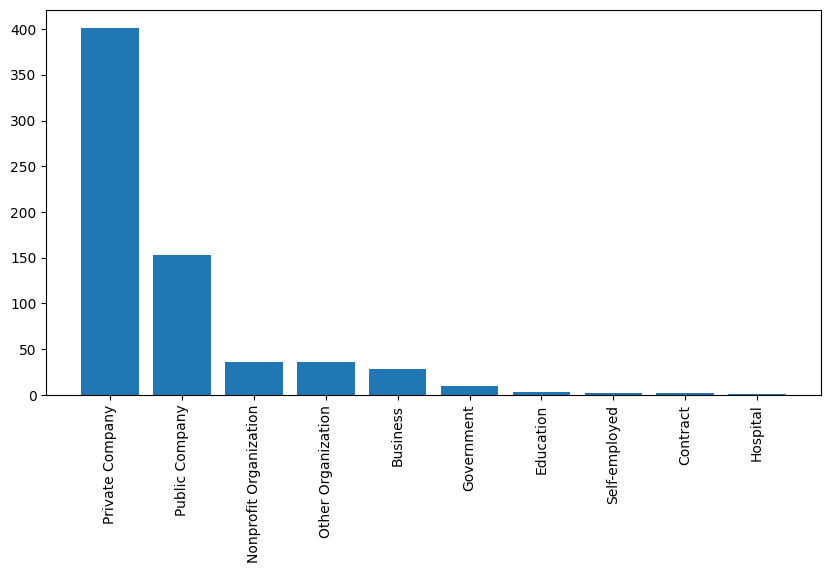

Type of ownership
Private Company           401
Public Company            153
Nonprofit Organization     36
Other Organization         36
Business                   28
Government                 10
Education                   3
Self-employed               2
Contract                    2
Hospital                    1
Name: count, dtype: int64

In [60]:
# 6.bar chart for ownership 
clean_df['Type of ownership']=clean_df['Type of ownership'].str.replace('-1','Unknown')
clean_df['Type of ownership']=clean_df['Type of ownership'].str.replace('Company - ','')
clean_df['Type of ownership']=clean_df['Type of ownership'].str.replace('Private Practice / Firm'
                                                                                ,'Private')
clean_df['Type of ownership']=clean_df['Type of ownership'].str.replace('Unknown','Other Organization')

ownership_clean_data = clean_df['Type of ownership'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(x=ownership_clean_data.index, height=ownership_clean_data.values )
plt.xticks(rotation=90)
plt.show()
ownership_clean_data

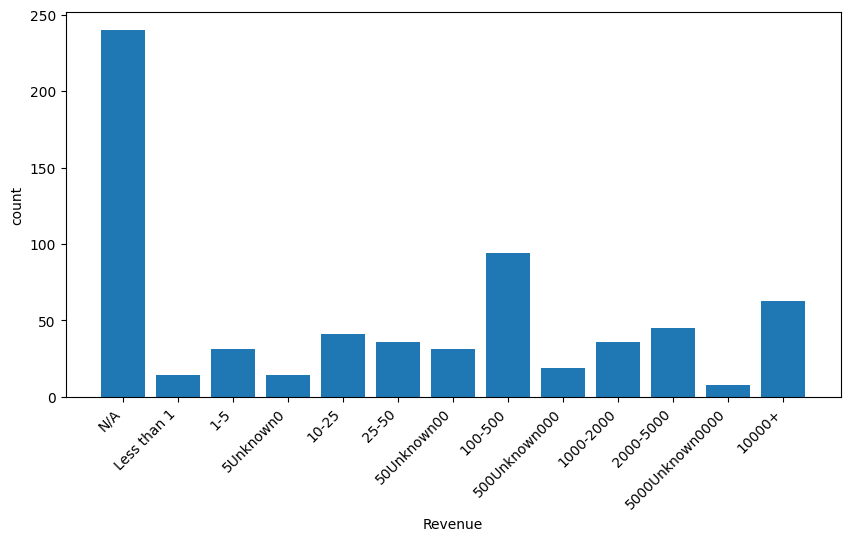

Revenue
N/A                240
100-500             94
10000+              63
2000-5000           45
10-25               41
1000-2000           36
25-50               36
50Unknown00         31
1-5                 31
500Unknown000       19
5Unknown0           14
Less than 1         14
5000Unknown0000      8
Name: count, dtype: int64

In [62]:
# 7.Bar chart for Revenue
idx = [1,8,13,11,5,10,6,7,3,9,4,2,12]
clean_df.Revenue = clean_df.Revenue.str.replace('Unknown / Non-Applicable', 'Unknown').str.replace('-1', 'Unknown').str.replace('$', '')
clean_df.Revenue = clean_df.Revenue.str.replace('million ', 'M').str.replace('billion ', 'B').str.replace('(USD)', '').str.replace('to', ':')
revenue_clean_data = clean_df.Revenue.value_counts()
revenue_clean_data=revenue_clean_data.reset_index()
revenue_clean_data['index']= idx
revenue_clean_data.set_index('index', drop=True, inplace=True)
revenue_clean_data.sort_index(inplace=True)
# print((revenue_clean_data))

plt.figure(figsize=(10,5))
sns.barplot(data = revenue_clean_data, x= 'Revenue', y = 'count', palette='Blues_d')
plt.bar(x=revenue_clean_data['Revenue'], height=revenue_clean_data['count'])
plt.xticks(rotation=45, ha='right')
plt.show()
clean_df.Revenue.value_counts()